In [9]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dalex as dx
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pprint import pprint

In [12]:
### Load dataset
dat_clay_df_mn = pd.read_csv('data_clay_with_features.csv')
dat_clay_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
dat_clay_df.head()

,Clay.gkg,OM.gkg,PC1,PC2,PC3,Elevation,Slope,Aspect,Hillshade,Northness,Eastness,HorizontalCurvature,VerticalCurvature,MeanCurvature,GaussianCurvature,MinimalCurvature,MaximalCurvature,ShapeIndex
0,301,22.21,0.048474,-0.021380,-0.007288,552.76940,63.597824,0.722694,0.443586,0.999912,0.012613,0.000113,0.004031,0.002072,9.619002e-06,-3.400000e+38,-3.400000e+38,-3.400000e+38
1,503,25.02,-1.032362,-0.070158,0.284260,589.15860,3.904992,136.244890,0.997627,-0.715256,0.684178,0.000290,0.000700,0.000495,1.579610e-07,1.974236e-04,7.924755e-04,1.062385e+00
2,120,15.00,1.532876,0.132782,-0.116509,568.14770,4.281324,53.001392,0.997440,0.601733,0.798567,-0.000035,-0.000012,-0.000024,-3.391669e-09,-8.787540e-05,4.036407e-05,-5.589423e-01
3,128,8.00,2.188105,0.132896,0.002301,583.13025,2.940146,78.488780,0.998828,0.198570,0.975596,0.000281,0.000141,0.000211,3.591735e-08,1.064860e-04,3.156874e-04,1.392971e+00
4,117,11.00,2.371611,-0.037706,-0.213574,574.91534,4.529469,35.659782,0.997094,0.808697,0.580295,0.000460,-0.000140,0.000160,-8.071994e-08,-1.646767e-04,4.846904e-04,3.162059e-01


<AxesSubplot:>

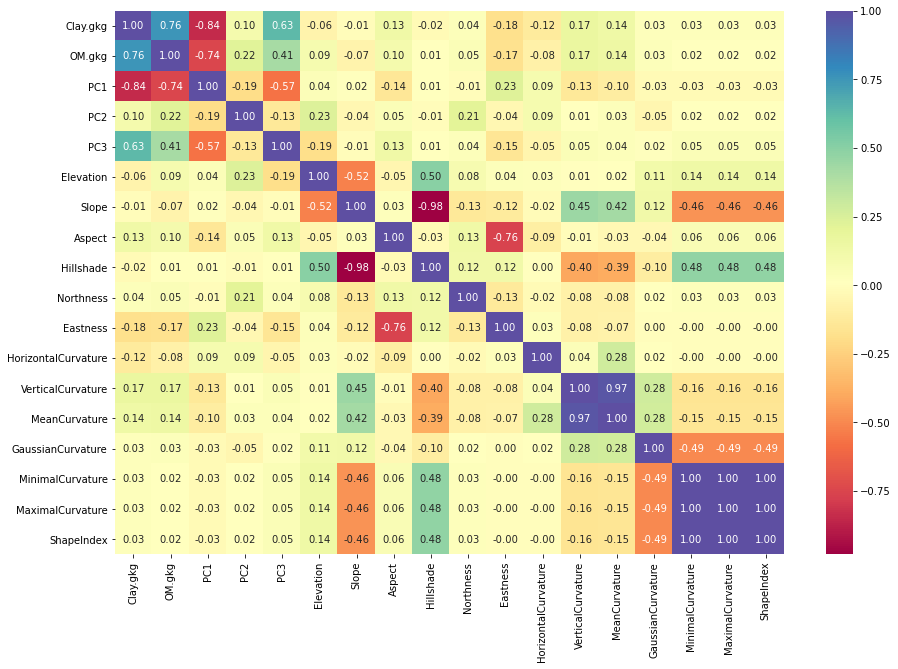

In [13]:
## Correlation analysis
dat_corr = dat_clay_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(dat_corr, cmap='Spectral', annot=True, fmt=".2f")

In [14]:
## Random Forest
## Separating covariates (X) from the target (y) variable
X = dat_clay_df.drop(['Clay.gkg', 'OM.gkg'], axis =1)
y = dat_clay_df[['Clay.gkg', 'OM.gkg']]
## Splitting the data into training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
# Initializing the Random Forest Regression model with 500 decision trees for predicting clay content
model_rf = RandomForestRegressor(n_estimators = 500)

# Fitting the Random Forest Regression model to the data
model_rf.fit(x_train, y_train['Clay.gkg'])

# Predicting the target values of the test set
y_pred = model_rf.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test['Clay.gkg'], y_pred)), '.3f'))
print("\nRMSE: ", rmse, 'g/kg')

# Calculate the absolute errors
errors = abs(y_pred - y_test['Clay.gkg'])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'g/kg.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test['Clay.gkg'])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


RMSE:  69.718 g/kg
Mean Absolute Error: 51.97 g/kg.
Accuracy: 73.57 %.


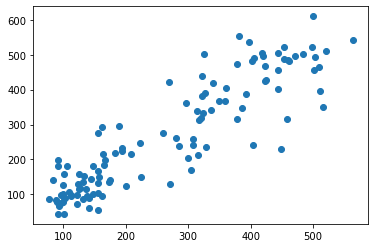

In [16]:
## Plotting the results
plt.scatter(y_pred, y_test['Clay.gkg'])
plt.show()

In [17]:
## Hyperparameter tunning
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

# Number of trees
n_tree = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]  #np.linspace return evenly spaced number over a specified interval

# Number of features at every split
features = ['auto', 'sqrt']

# Number of leaves in each tree
depth = [int(x) for x in np.linspace(10, 100, num = 10)]
depth.append(None)

# Number of samples to split a node
samples_split = [2, 4, 6, 8, 10, 12, 14, 16]

# Number of samples at each leaf node
samples_leaf = [1, 2, 4, 6, 8, 10]

# Method of selectin sampels
bootstrap = ['True', 'False']

# Create the random grid
random_search = {'n_estimators': n_tree,
               'max_features': features,
               'max_depth': depth,
               'min_samples_split': samples_split,
               'min_samples_leaf': samples_leaf,
               'bootstrap': bootstrap}


print('\nParameters set:\n')
pprint(random_search)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Parameters set:

{'bootstrap': ['True', 'False'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [18]:
## Run the model with the hyperparameter tuning
model_rf_tun = RandomForestRegressor()

model_rf_random = RandomizedSearchCV(estimator = model_rf_tun, param_distributions = random_search, n_iter = 50, cv = 5, verbose = 2, n_jobs = -1)

model_rf_random.fit(x_train, y_train['Clay.gkg'])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   33.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   verbose=2)

In [31]:
## Best parameters
model_rf_random.best_params_

{'n_estimators': 450,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': 'False'}

In [32]:
## Evaluate the hyperparameter tunning
def eval_model(model, features, target):
    predictions = model.predict(features)
    rmse = float(format(np.sqrt(mean_squared_error(target, predictions)), '.3f'))
    print ('Performance')
    print('RMSE = ', rmse)
    
    return rmse

# Base model - withouth tunning hyperparameters
base_rf = model_rf
base_rf.fit(x_train, y_train)
base_acc = eval_model(base_rf, x_test, y_test['Clay.gkg'])

## Improved model
best_model = model_rf_random.best_estimator_
best_acc = eval_model(best_model, x_test, y_test['Clay.gkg'])

print('Improvement of ', (best_acc - base_acc))

ValueError: y_true and y_pred have different number of output (1!=2)

In [33]:
## Set cross-validation parameters
param_grid_cv = {'n_estimators': [10, 20, 300, 400, 500], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [2, 4], 'max_features': [2, 3, 5], 'max_depth': [20, 40, 80, 90, 100, 110], 'bootstrap': [True, False]}

model_rf_cv = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model_rf_cv, param_grid = param_grid_cv, cv = 10, n_jobs = -1, verbose = 2)

## Fit the grid search to the training data
grid_search.fit(x_train, y_train['Clay.gkg'])
grid_search.best_params_


Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 437 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1802 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2553 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3384 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4257 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5234 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6341 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 7792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9250 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:  9.4min finished


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [23]:
## Measuring the improvement
best_grid = grid_search.best_estimator_
grid_acc = eval_model(best_grid, x_test, y_test['Clay.gkg'])

print('Improvement of {:0.2f}%.'.format( 100 * (grid_acc - base_acc) / base_acc))

Performance
Average error: 59.1182 mm/mm.
RMSE =  74.117
Improvement of 1.06%.



RMSE:  74.117 g/kg
Mean Absolute Error: 59.12 g/kg.
Accuracy:  74.12


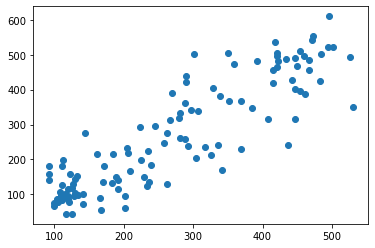

In [24]:
# Predicting the target values of the test set from the best grid
y_pred_best_grid = best_grid.predict(x_test)

# RMSE (Root Mean Square Error)
rmse_best_grid = float(format(np.sqrt(mean_squared_error(y_test['Clay.gkg'], y_pred_best_grid)), '.3f'))
print("\nRMSE: ", rmse_best_grid, 'g/kg')
# Calculate the absolute errors
errors_best_grid = abs(y_pred_best_grid - y_test['Clay.gkg'])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_best_grid), 2), 'g/kg.')
print('Accuracy: ', round(grid_acc,2))

## Plotting the results
plt.scatter(y_pred_best_grid, y_test['Clay.gkg'])
plt.show()

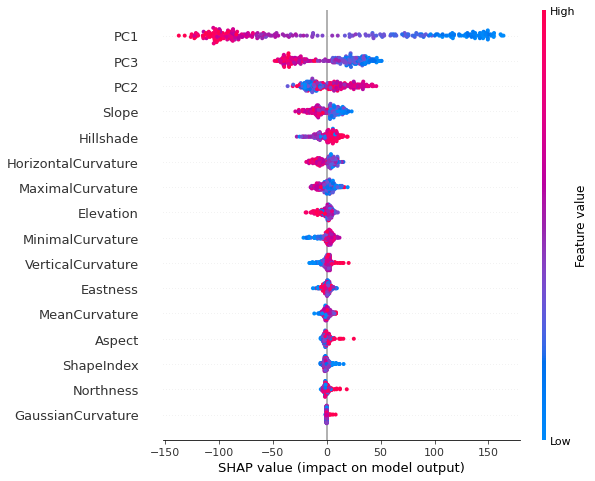

In [165]:
## Shapley values to explain RF models
explainer = shap.TreeExplainer(best_grid)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, features = x_train, feature_names = x_train.columns)

In [1]:
shap.initjs()
i = 16
shap.force_plot(explainer.expected_value, shap_values[i], features=x_train.loc[i], feature_names=x_train.columns)

NameError: name 'shap' is not defined